Submit a notebook file to the assingment on Canvas. Be sure to include your name at the top. You may edit the heading below this line.

## Abdou Sow


---



Consider the [`county`](https://www.rdocumentation.org/packages/openintro/versions/1.7.1/topics/countyComplete) dataset.

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
df=pd.read_csv('https://raw.githubusercontent.com/cpaniaguam/CSC104/main/county_complete.csv')


**Question 1: Change in population**
1. Add a new column `pop_change` to `df` with the population change of each county from 2010 to 2017, and answer the following.
2. List the top 10 counties in which `pop_change` increased the most.
3. List the 10 counties in which `pop_change` increased the least.
4. List the 10 counties in which `pop_change` decreased the most. Produce appropiate visualizations for these statistics.


2623         Harris County
103        Maricopa County
204     Los Angeles County
2969           King County
362      Miami-Dade County
1748          Clark County
2579         Dallas County
2742        Tarrant County
2537          Bexar County
222       San Diego County
Name: name, dtype: object


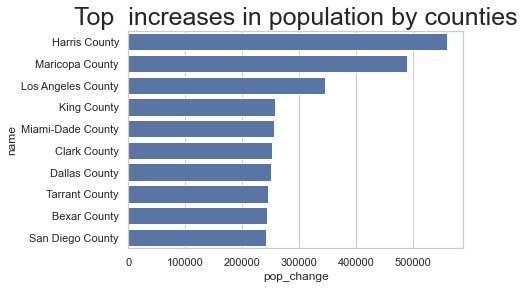

 
2653       Kenedy County
923       Greeley County
261       Dolores County
1652       Wibaux County
1019      Clinton County
1658       Blaine County
1668        Chase County
1710        Logan County
2290      Montour County
2010    Hettinger County
Name: name, dtype: object


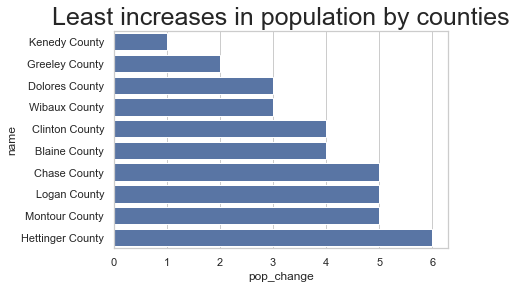

 
1312           Wayne County
2060        Cuyahoga County
1255         Genesee County
2308    Westmoreland County
2090           Lucas County
1597         St. Louis city
2254         Cambria County
695        Winnebago County
741             Lake County
2120        Trumbull County
Name: name, dtype: object


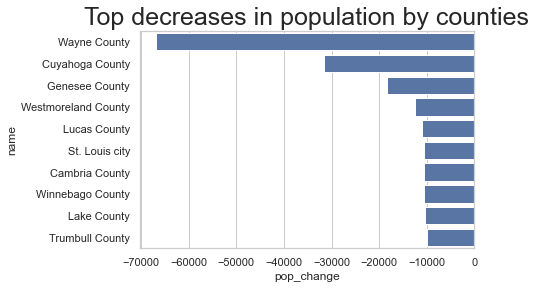

In [6]:

a=df['pop2017']-df['pop2010']
df['pop_change']=a


b=df.nlargest(10,['pop_change'])
c=b[0:11]

print(c['name'])
poi=c[["name", "pop_change"]]
sns.set(style="whitegrid",color_codes=True)
plt.title('Top  increases in population by counties', fontsize=25)
sns.barplot(x='pop_change',y='name', color="b", data=poi);
plt.show()
print(' ')

f=df[df.pop_change>0]

g=f.nsmallest(10,['pop_change'])

print(g['name'])
sns.set(style="whitegrid",color_codes=True)
plt.title('Least increases in population by counties', fontsize=25)
sns.barplot(x='pop_change',y='name', color="b", data=g);
plt.show()
print(" ")

d=df.nsmallest(10,['pop_change'])
print(d['name'])
sns.set(style="whitegrid",color_codes=True)
plt.title('Top decreases in population by counties', fontsize=25)
sns.barplot(x='pop_change',y='name', color="b", data=d);
plt.show()


**Question 2: Counties populations**

1. What is the mean population $\bar{x}_{pop}$ and standard deviation $s_{pop}$ for all US counties in 2017?</li>
2. What is the median population for all US counties in 2017?</li>
3. List 10 counties (and their respective states) that are within one $s_{pop}$ from the mean population $\bar{x}_{pop}$. Are there any in the State of Rhode Island?
4. List 10 counties (and their respective states) that are within one $s_{pop}$ from the mean population $\bar{x}_{pop}$. Are there any in the State of Rhode Island?
5. What proportion of all counties fall within one $s_{pop}$ from $\bar{x}_{pop}$?
6. What proportion of all counties *do not* fall within *two* standard deviations from $\bar{x}_{pop}$? How many are there? Store them in a data structure of your choice named `counties_greater_2sd`.
7. Construct a vertical dot plot for the `pop2017` variable and identify what counties are labeled as outliers. Store these counties in a variable `outliers`.  Compare and contrast `outliers` with `counties_greater_2sd`.
8. Which statitic is a better descriptor for `pop2017`, its mean $\bar{x}_{pop}$ or its median. Explain.

The mean is 103763.41350748646 and the standard deviation is 333194.5194607531

The median is 25857.0

0     Autauga County
1     Baldwin County
2     Barbour County
3        Bibb County
4      Blount County
5     Bullock County
6      Butler County
7     Calhoun County
8    Chambers County
9    Cherokee County
Name: name, dtype: object

The proportion of countries within 1 sd is 94.74856779121579

3056 countries fall within 2sd for a proportion of 97.26288987905792 of the total number of counties

          state              name   FIPS     pop2000  pop2010     pop2011  \
1       Alabama    Baldwin County   1003 140,415.000   182265 186,534.000   
36      Alabama  Jefferson County   1073 662,047.000   658466 657,789.000   
40      Alabama        Lee County   1081 115,092.000   140247 144,117.000   
44      Alabama    Madison County   1089 276,700.000   334811 339,519.000   
48      Alabama     Mobile County   1097 399,843.000   412992 413,232.000   
...         ...               ... 

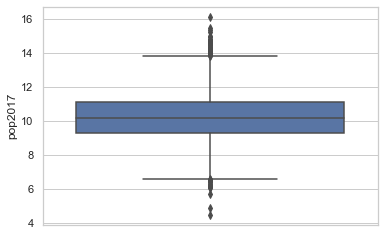

In [7]:
x_pop=df['pop2017'].mean()
s_pop=df['pop2017'].std()
print("The mean is {} and the standard deviation is {}\n".format(x_pop,s_pop))

med_pop=df['pop2017'].median()
print('The median is {}\n'.format(med_pop))

ml=df[abs(df.pop2017-x_pop)<=s_pop]
print(ml.head(10)['name'])

print('\nThe proportion of countries within 1 sd is {}\n'.format(len(ml)/len(df)*100))

countries_greater_2sd=df[abs(df.pop2017-x_pop)<(2*s_pop)]
print('{} countries fall within 2sd for a proportion of {} of the total number of counties\n'.format(len(countries_greater_2sd),len(countries_greater_2sd)/len(df)*100))


a=df['pop2017'].describe()
q1=a['25%']
q3=a['75%']
iq=1.5*(q3-q1)

outliers=df[(df.pop2017 < q1-iq) | (df.pop2017>q3+iq)]
print(outliers)
print(countries_greater_2sd)



datzz=df['pop2017'].apply(lambda num: math.log(num))
sns.boxplot(y=datzz)
plt.show()





The median statistic is  a better descriptor for pop 2017 because of the numbers of outliers that will influence the mean.

**Question 3**
1. What is the population of the US in 2017?
2. Define a new variable `pop_proportion_2017` with the relative population of each county with respect to the US population in 2017.
3. Construct a histogram using `pop_proportion_2017` and an adequate number of bins. What can you say about this distribution?

The US population in 2017 is 325713355
0      0.017
1      0.065
2      0.008
3      0.007
4      0.018
        ... 
3137   0.013
3138   0.007
3139   0.006
3140   0.002
3141   0.002
Name: pop_proportion_2017, Length: 3142, dtype: float64


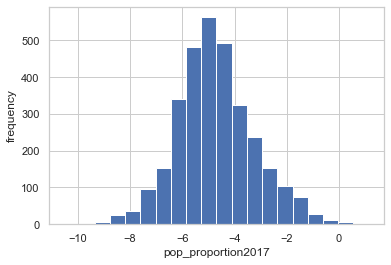

In [8]:
pop=df['pop2017'].tolist()


population_us_2017 = 0
m=0
while m<len(pop) :
  for z in pop:
    try :
     population_us_2017= population_us_2017 + int(z)
    
    except:
      population_us_2017+=0
    m+=1
    
print("The US population in 2017 is {}".format(population_us_2017))

df['pop_proportion_2017']=df['pop2017']/population_us_2017*100

print(df['pop_proportion_2017'])



fig, ax = plt.subplots()
plt.hist(df['pop_proportion_2017'].apply(lambda num: math.log(num)), bins=20
         )
ax.set_xlabel('pop_proportion2017')
ax.set_ylabel('frequency')

plt.show()

This distribution is really even as some counties are much bigger than others.